# 7— Load and Explore driver_feedback_data

In [1]:
# Step 7 — Load and Explore Cleaned Driver Feedback Data

import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df_feedback = pd.read_csv("driver_feedback_cleaned.csv")

# Quick look
df_feedback.head()


,driver_id,timestamp,feedback_text,platform,city,clean_text,processed_text
0,1061,2025-11-03 16:32:47,Fuel cost too high this week.,Reddit,Hyderabad,fuel cost too high this week,fuel cost high week
1,1096,2025-11-03 23:37:00,Too many cancellations this morning.,In-App Feedback,Delhi,too many cancellations this morning,many cancellation morning
2,1015,2025-11-02 17:31:24,Too many cancellations this morning.,In-App Feedback,Chennai,too many cancellations this morning,many cancellation morning
3,1060,2025-11-05 19:27:47,Passengers not available at night.,Reddit,Mumbai,passengers not available at night,passenger available night
4,1090,2025-10-30 17:07:58,Too many cancellations this morning.,Reddit,Mumbai,too many cancellations this morning,many cancellation morning


In [2]:
df_feedback.info()
df_feedback.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   driver_id       2000 non-null   int64 
 1   timestamp       2000 non-null   object
 2   feedback_text   2000 non-null   object
 3   platform        2000 non-null   object
 4   city            2000 non-null   object
 5   clean_text      2000 non-null   object
 6   processed_text  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


,driver_id,timestamp,feedback_text,platform,city,clean_text,processed_text
count,2000.000000,2000,2000,2000,2000,2000,2000
unique,NaN,1998,10,3,6,10,10
top,NaN,2025-11-08 22:27:24,Traffic jam reduced earning.,Reddit,Pune,traffic jam reduced earning,traffic jam reduced earning
freq,NaN,2,222,694,348,222,222
mean,1050.411000,NaN,NaN,NaN,NaN,NaN,NaN
std,29.740954,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1024.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1077.000000,NaN,NaN,NaN,NaN,NaN,NaN


# 7.4 Basic Text Length & Rating Distribution

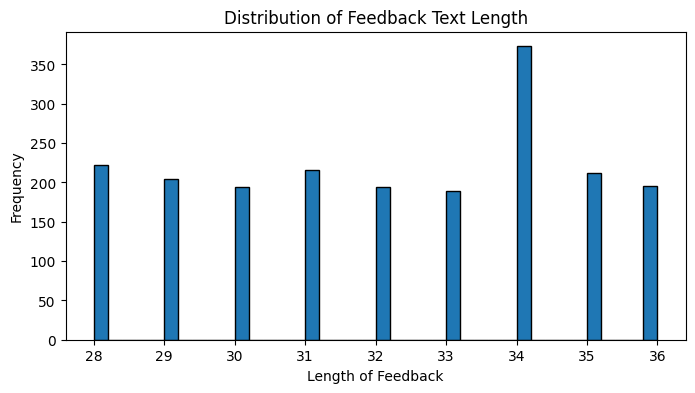

In [3]:
df_feedback['text_length'] = df_feedback['feedback_text'].apply(len)

# Text length distribution
plt.figure(figsize=(8,4))
plt.hist(df_feedback['text_length'], bins=40, edgecolor='black')
plt.title('Distribution of Feedback Text Length')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Rating distribution (if available)
if 'rating' in df_feedback.columns:
    df_feedback['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()


In [5]:
df_feedback.columns

Index(['driver_id', 'timestamp', 'feedback_text', 'platform', 'city',
       'clean_text', 'processed_text', 'text_length'],
      dtype='object')

In [8]:
!pip install wordcloud pillow

In [1]:
!pip install VaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [14]:
# Quick inspection of the cleaned driver feedback (df_feedback is already loaded)

# Basic overview
print("Shape:", df_feedback.shape)
print("Columns:", list(df_feedback.columns))

# Info and preview
df_feedback.info()
display(df_feedback.head(20))

# Random sample and simple aggregations
display(df_feedback.sample(5, random_state=42))

if 'city' in df_feedback.columns:
    print("\nFeedback counts by city:")
    print(df_feedback['city'].value_counts())

if 'platform' in df_feedback.columns:
    print("\nFeedback counts by platform:")
    print(df_feedback['platform'].value_counts())

Shape: (2000, 8)
Columns: ['driver_id', 'timestamp', 'feedback_text', 'platform', 'city', 'clean_text', 'processed_text', 'text_length']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   driver_id       2000 non-null   int64 
 1   timestamp       2000 non-null   object
 2   feedback_text   2000 non-null   object
 3   platform        2000 non-null   object
 4   city            2000 non-null   object
 5   clean_text      2000 non-null   object
 6   processed_text  2000 non-null   object
 7   text_length     2000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


,driver_id,timestamp,feedback_text,platform,city,clean_text,processed_text,text_length
0,1061,2025-11-03 16:32:47,Fuel cost too high this week.,Reddit,Hyderabad,fuel cost too high this week,fuel cost high week,29
1,1096,2025-11-03 23:37:00,Too many cancellations this morning.,In-App Feedback,Delhi,too many cancellations this morning,many cancellation morning,36
2,1015,2025-11-02 17:31:24,Too many cancellations this morning.,In-App Feedback,Chennai,too many cancellations this morning,many cancellation morning,36
3,1060,2025-11-05 19:27:47,Passengers not available at night.,Reddit,Mumbai,passengers not available at night,passenger available night,34
4,1090,2025-10-30 17:07:58,Too many cancellations this morning.,Reddit,Mumbai,too many cancellations this morning,many cancellation morning,36
5,1098,2025-11-08 17:05:27,Traffic jam reduced earning.,Reddit,Delhi,traffic jam reduced earning,traffic jam reduced earning,28
6,1052,2025-11-06 19:14:21,Low demand in industrial area.,Twitter,Pune,low demand in industrial area,low demand industrial area,30
7,1078,2025-10-31 00:56:07,Traffic jam reduced earning.,In-App Feedback,Bangalore,traffic jam reduced earning,traffic jam reduced earning,28
8,1024,2025-11-10 19:06:05,Low demand in industrial area.,Reddit,Hyderabad,low demand in industrial area,low demand industrial area,30
9,1002,2025-11-02 10:02:04,Too many cancellations this morning.,In-App Feedback,Mumbai,too many cancellations this morning,many cancellation morning,36


,driver_id,timestamp,feedback_text,platform,city,clean_text,processed_text,text_length
1860,1069,2025-11-01 04:53:19,Long waiting time near station.,Twitter,Mumbai,long waiting time near station,long waiting time near station,31
353,1087,2025-10-29 16:29:18,App payment failed multiple times.,Twitter,Delhi,app payment failed multiple times,app payment failed multiple time,34
1333,1013,2025-11-05 17:03:13,Fuel cost too high this week.,In-App Feedback,Hyderabad,fuel cost too high this week,fuel cost high week,29
905,1093,2025-11-07 23:37:53,App payment failed multiple times.,Reddit,Bangalore,app payment failed multiple times,app payment failed multiple time,34
1289,1013,2025-11-07 20:14:08,Low demand in industrial area.,Reddit,Delhi,low demand in industrial area,low demand industrial area,30



Feedback counts by city:
city
Pune         348
Mumbai       348
Delhi        343
Hyderabad    333
Chennai      316
Bangalore    312
Name: count, dtype: int64

Feedback counts by platform:
platform
Reddit             694
In-App Feedback    679
Twitter            627
Name: count, dtype: int64


# 8 — Text Preprocessing (Cleaning + Tokenization + Stopwords + Lemmatization)

In [15]:
# Step 8: Text Preprocessing + Sentiment Analysis (based on cleaned data)

import pandas as pd
import re
from textblob import TextBlob

# Load cleaned driver feedback
df = pd.read_csv("driver_feedback_cleaned.csv")

# Preview columns
print("Columns in file:\n", df.columns)

# Detect feedback text column automatically
possible_cols = [col for col in df.columns if 'feedback' in col.lower() or 'comment' in col.lower() or 'text' in col.lower()]
text_col = possible_cols[0] if possible_cols else None

if text_col is None:
    raise ValueError("⚠️ Couldn't detect feedback text column. Please manually specify the correct column name.")

print(f"\n📝 Using column for feedback text: '{text_col}'")

# Clean feedback text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_feedback'] = df[text_col].apply(clean_text)

# Generate sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_feedback'].apply(get_sentiment)

# Show sentiment distribution
print("\n✅ Sentiment distribution:")
print(df['sentiment'].value_counts())

# Save final version
df.to_csv("driver_feedback_sentiment.csv", index=False)
print("\n💾 Saved sentiment results to 'driver_feedback_sentiment.csv'")


Columns in file:
 Index(['driver_id', 'timestamp', 'feedback_text', 'platform', 'city',
       'clean_text', 'processed_text'],
      dtype='object')

📝 Using column for feedback text: 'feedback_text'

✅ Sentiment distribution:
sentiment
Positive    995
Neutral     632
Negative    373
Name: count, dtype: int64

💾 Saved sentiment results to 'driver_feedback_sentiment.csv'


# 9. Text Mining & Keyword Extraction

In [16]:
# Step 9: Text Mining & Keyword Extraction (light version, no extra file)

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the sentiment file
df = pd.read_csv("driver_feedback_sentiment.csv")

# --------------------------
# 🔹 TF-IDF Keyword Extraction
# --------------------------
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20)
X = vectorizer.fit_transform(df['cleaned_feedback'])
keywords = vectorizer.get_feature_names_out()

df['top_keywords'] = None  # placeholder column for visualization later

print("✅ Top 20 TF-IDF Keywords:")
print(keywords)

# --------------------------
# 🔹 Sentiment-wise keywords
# --------------------------
def get_top_keywords(subset, n=5):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=n)
    X = vectorizer.fit_transform(subset['cleaned_feedback'])
    return vectorizer.get_feature_names_out()

positive_keywords = get_top_keywords(df[df['sentiment'] == 'Positive'])
negative_keywords = get_top_keywords(df[df['sentiment'] == 'Negative'])
neutral_keywords = get_top_keywords(df[df['sentiment'] == 'Neutral'])

print("\n💬 Positive Feedback Keywords:", list(positive_keywords))
print("💬 Negative Feedback Keywords:", list(negative_keywords))
print("💬 Neutral Feedback Keywords:", list(neutral_keywords))

# Add a summary section in your notebook output
print("\n📊 Keyword extraction complete — data stays in driver_feedback_sentiment.csv.")


✅ Top 20 TF-IDF Keywords:
['airport area' 'area' 'earning' 'jam' 'jam reduced' 'long' 'long waiting'
 'near' 'near airport' 'near station' 'reduced' 'reduced earning'
 'station' 'time' 'time near' 'traffic' 'traffic jam' 'traffic near'
 'waiting' 'waiting time']

💬 Positive Feedback Keywords: ['airport', 'airport area', 'area', 'near airport', 'traffic near']
💬 Negative Feedback Keywords: ['app', 'app payment', 'failed', 'failed multiple', 'multiple']
💬 Neutral Feedback Keywords: ['earning', 'jam', 'jam reduced', 'reduced', 'reduced earning']

📊 Keyword extraction complete — data stays in driver_feedback_sentiment.csv.


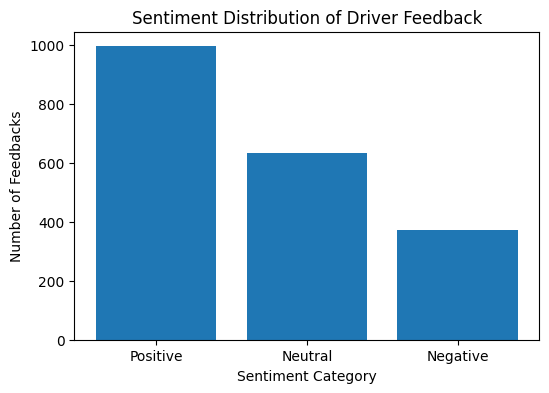

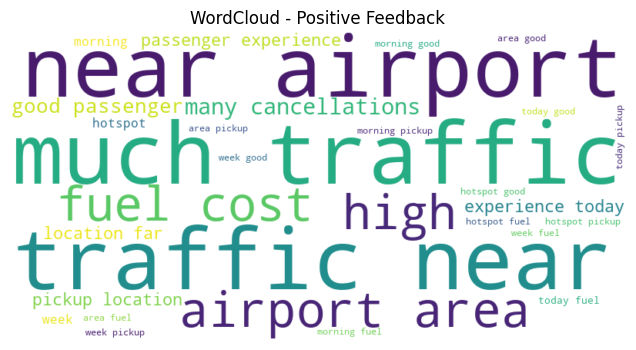

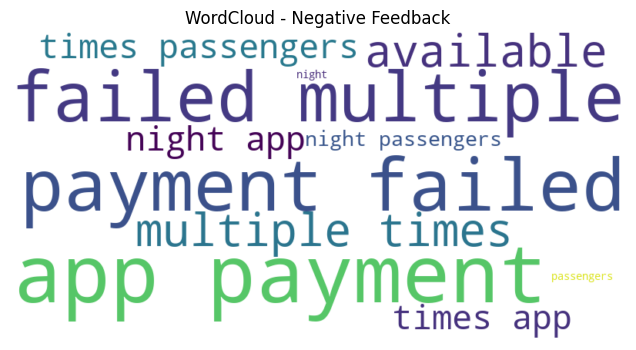

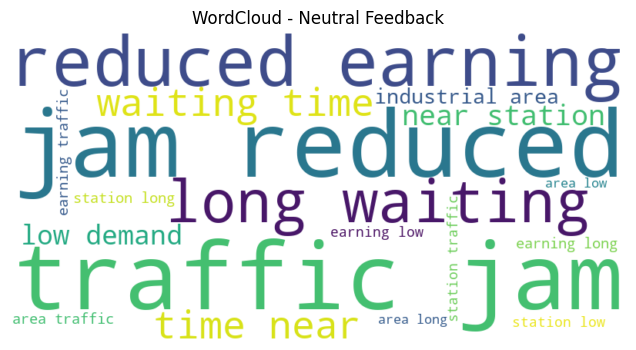


✅ Step 10 complete: Visualizations generated successfully.


In [18]:
# Step 10: Visualization of Sentiment & Keywords (no new files)

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load data
df = pd.read_csv("driver_feedback_sentiment.csv")

# --------------------------
# 🔹 Sentiment Distribution
# --------------------------
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution of Driver Feedback")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Feedbacks")
plt.show()

# --------------------------
# 🔹 Word Clouds by Sentiment
# --------------------------
def generate_wordcloud(text, title):
    if len(text.strip()) == 0:
        print(f"⚠️ No text available for {title}")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Create word clouds
for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = df[df['sentiment'] == sentiment]
    combined_text = " ".join(subset['cleaned_feedback'].astype(str))
    generate_wordcloud(combined_text, f"WordCloud - {sentiment} Feedback")

print("\n✅ Step 10 complete: Visualizations generated successfully.")


# INSIGHTS
Figure 1: Sentiment Distribution of Driver Feedback”

Figure 2: Positive Feedback Word Cloud
A bar chart showing how many feedbacks were positive, negative, and neutral.

Three word clouds highlighting most frequent words in each sentiment category.

✅ Step 11 complete — Feedback Categories Assigned.

category
Other                  978
Traffic Delay          434
Fare Concern           394
Positive Experience    194
Name: count, dtype: int64


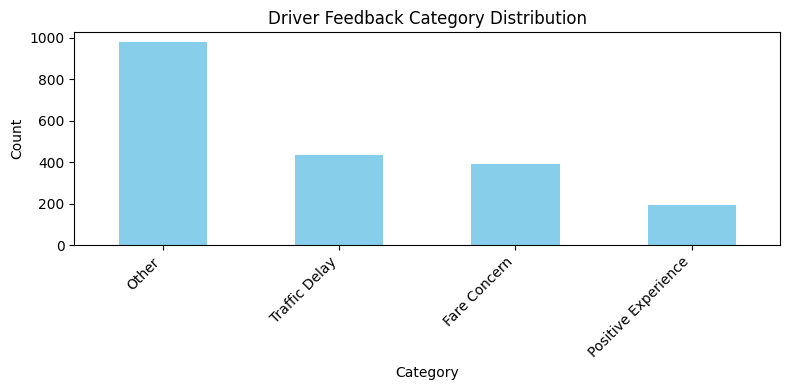

In [19]:
# Step 11: Text Classification - Categorizing Feedback into Themes (no new files)

import pandas as pd
import re

# Load the same sentiment dataset
df = pd.read_csv("driver_feedback_sentiment.csv")

# --------------------------------
# 🔹 Rule-based keyword classifier
# --------------------------------

def classify_feedback(text):
    text = str(text).lower()
    if any(word in text for word in ["traffic", "jam", "delay", "road", "route"]):
        return "Traffic Delay"
    elif any(word in text for word in ["fare", "price", "cost", "expensive", "payment"]):
        return "Fare Concern"
    elif any(word in text for word in ["app", "booking", "crash", "login", "error"]):
        return "App/Booking Issue"
    elif any(word in text for word in ["rude", "customer", "behavior", "argue"]):
        return "Customer Behavior"
    elif any(word in text for word in ["car", "vehicle", "maintenance", "condition", "clean"]):
        return "Service Issue"
    elif any(word in text for word in ["great", "good", "happy", "satisfied", "excellent"]):
        return "Positive Experience"
    else:
        return "Other"

df["category"] = df["cleaned_feedback"].apply(classify_feedback)

# --------------------------------
# 🔹 Display Summary
# --------------------------------
print("✅ Step 11 complete — Feedback Categories Assigned.\n")
print(df["category"].value_counts())

# Visualize as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df["category"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Driver Feedback Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 12 — Dimensionality Reduction & Clustering
TF-IDF vectors → numerical representation of text

PCA (Principal Component Analysis) → reduce dimensions for visualization

KMeans Clustering → group similar feedbacks automatically


✅ Step 12 complete — Cluster labels assigned.

cluster
0    972
1    622
3    222
2    184
Name: count, dtype: int64


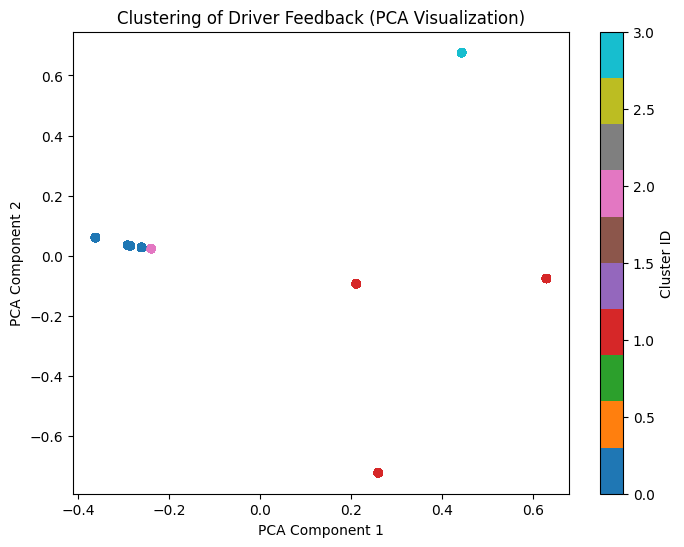

In [20]:
# Step 12: Dimensionality Reduction & Clustering (no new files)

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the existing dataset
df = pd.read_csv("driver_feedback_sentiment.csv")

# Use the cleaned feedback
texts = df["cleaned_feedback"].fillna("")

# -------------------------------
# 🔹 TF-IDF Vectorization
# -------------------------------
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X = vectorizer.fit_transform(texts)

# -------------------------------
# 🔹 KMeans Clustering
# -------------------------------
num_clusters = 4  # You can adjust to 3–6 based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

print("\n✅ Step 12 complete — Cluster labels assigned.\n")
print(df["cluster"].value_counts())

# -------------------------------
# 🔹 Dimensionality Reduction (PCA)
# -------------------------------
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=df["cluster"], cmap="tab10", s=30)
plt.title("Clustering of Driver Feedback (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster ID")
plt.show()
